In [1]:
import catboost
import pandas as pd
import csv
import numpy as np
from scipy import stats
import lightgbm as lgb
import xgboost as xgb
import catboost as ctb
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

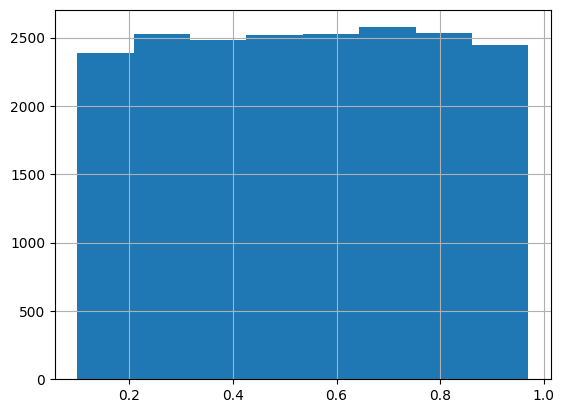

In [2]:
df = pd.read_csv("./data/value.csv", sep=";")
df.dtypes
nomCol = df.columns[5]
hist = df[nomCol].hist(bins=int(len(pd.unique(df[nomCol]))/10))


In [3]:
test = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]
print(df["Latence1"].min())

0.0590122753


<AxesSubplot: xlabel='Latence1'>

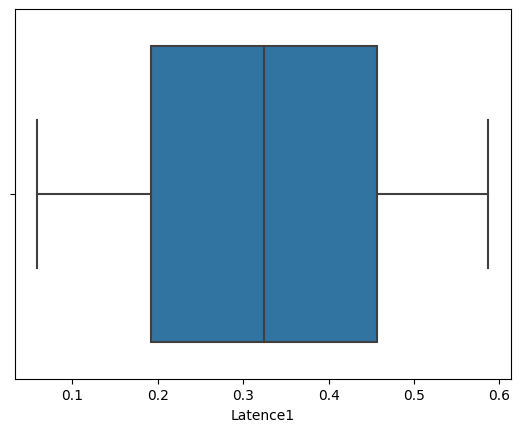

In [4]:
sns.boxplot(x=df["Latence1"])

In [5]:
y = df["Latence1"]
x = df[["CPU1", "RAM1"]]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [6]:
X_train

,CPU1,RAM1
17815,0.51,0.4
18370,0.46,0.5
1379,0.76,0.3
14763,0.35,0.7
7346,0.54,0.4
...,...,...
13123,0.80,0.5
19648,0.48,0.5
9845,0.58,0.4
10799,0.71,0.5


In [9]:
model = ctb.CatBoostRegressor(learning_rate=1, depth=11, loss_function='RMSE', iteration=200)

In [10]:
model.fit(X_train, y_train)

train_score = mean_squared_error(y_train, model.predict(X_train), squared=False)
test_score = mean_squared_error(y_test, model.predict(X_test), squared=False)

print("Train Score:", train_score)
print("Test Score:", test_score)

0:	learn: 0.1520799	total: 31.9ms	remaining: 31.9s
1:	learn: 0.1519225	total: 49.2ms	remaining: 24.5s
2:	learn: 0.1518480	total: 56.7ms	remaining: 18.8s
3:	learn: 0.1518190	total: 64.7ms	remaining: 16.1s
4:	learn: 0.1517679	total: 70.3ms	remaining: 14s
5:	learn: 0.1516618	total: 77.4ms	remaining: 12.8s
6:	learn: 0.1516519	total: 83.1ms	remaining: 11.8s
7:	learn: 0.1516459	total: 87.4ms	remaining: 10.8s
8:	learn: 0.1515949	total: 95.3ms	remaining: 10.5s
9:	learn: 0.1514972	total: 110ms	remaining: 10.9s
10:	learn: 0.1514686	total: 119ms	remaining: 10.7s
11:	learn: 0.1513244	total: 152ms	remaining: 12.5s
12:	learn: 0.1511471	total: 186ms	remaining: 14.1s
13:	learn: 0.1510163	total: 218ms	remaining: 15.3s
14:	learn: 0.1508733	total: 251ms	remaining: 16.5s
15:	learn: 0.1507637	total: 283ms	remaining: 17.4s
16:	learn: 0.1506332	total: 316ms	remaining: 18.3s
17:	learn: 0.1505684	total: 351ms	remaining: 19.1s
18:	learn: 0.1504517	total: 383ms	remaining: 19.8s
19:	learn: 0.1504023	total: 409ms	